<a href="https://colab.research.google.com/github/kyle29-git/kyle29-git_64061/blob/main/A1_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Preparing data
max_features = 10000
maxlen = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Build model
model = keras.Sequential([
    layers.Embedding(max_features, 32),
    layers.Flatten(),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid"),
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=512,
    validation_split=0.2
)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 143ms/step - accuracy: 0.5131 - loss: 0.6929 - val_accuracy: 0.5526 - val_loss: 0.6804
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.5888 - loss: 0.6641 - val_accuracy: 0.7332 - val_loss: 0.5856
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.7901 - loss: 0.5140 - val_accuracy: 0.6892 - val_loss: 0.5757
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 0.8420 - loss: 0.3561 - val_accuracy: 0.8508 - val_loss: 0.3427
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.9102 - loss: 0.2324 - val_accuracy: 0.8544 - val_loss: 0.3362
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9323 - loss: 0.1781 - val_accuracy: 0.8672 - val_loss: 0.3228
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.9539 - loss: 0.1313 - val_accuracy: 0.8732 - val_loss: 0.3260
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.9730 - loss: 0.0881 - val_accuracy: 0.868

In [ ]:
# 1. One vs Two vs Three Hidden Layers
# One hidden layer best training accuracy = .9994, best validation accuarcy = .8714
# Two hidden layers best training accuracy = 1.0000, best validation accuarcy = .8698
# Three hidden layers best training accuracy = .9999, best validation accuarcy = .8648

# This indicates that one layer is the best generalization compared to two hidden layers being slightly overfitting
# and three layers being the most overfitting due to also learning noise. Adding more layers increased the model
# complexity without improving generalization.


# 2. More / Fewer Hidden Units
# 16 hidden units inside Dense(), best training accuracy = .9994, best validation accuarcy = .8714
# 32 hidden units inside Dense(), best training accuracy = .9999, best validation accuarcy = .8718
# 64 hidden units inside Dense(), best training accuracy = .9999, best validation accuarcy = .8662
# 128 hidden units inside Dense(), best training accuracy = 1.0000, best validation accuarcy = .8696

# This indicates that 32 hidden units is the best balance of training and validation accuracy.
# As the number of hidden units increases the model becomes more powerful. Training accuracy stays near perfect
# while the validation stops impoving and begins to drop.

# 3. MSE Loss Instead of Binary Crossentropy
# binary_crossentropy, best training accuracy = .9999, best validation accuarcy = .8718
# mse, best training accuracy = .9981, best validation accuarcy = .8650

# Binary Crossentropy is the best learning signal while MSE is weaker for classification.
# The model trained with a loss function designed for classification learned more useful decision boundaries
# than one trained with a regression-style loss.

# 4. tanh Instead of relu
# relu, best training accuracy = .9999, best validation accuarcy = .8718
# tanh, best training accuracy = .9999, best validation accuarcy = .8606

# relu is better for generalization while tanh overfits and trains less effectivly.
# The difference is about how efficiently the network learns useful features and relu transferred that
# learning better to unseen data.

# 5. Regularization and Dropout
# Dropout,  best training accuracy = .7188, best validation accuarcy = .5884
#   code: layers.Dropout(0.5)
# Regularization, best training accuracy = .9984, best validation accuarcy = .8642
#   code: kernel_regularizer=keras.regularizers.l2(0.001)

# The Dropout method was underfitting while the Regularization method reduced overfitting but still did
# not have the best improvment on performance. The model struggled to learn the training data properly.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Hyperparameter Tuning Summary Table

results_data = [
    # Hidden Layers
    ["Hidden Layers", "1 layer", 0.9994, 0.8714, "Best generalization"],
    ["Hidden Layers", "2 layers", 1.0000, 0.8698, "Slight overfitting"],
    ["Hidden Layers", "3 layers", 0.9999, 0.8648, "Overfitting"],

    # Hidden Units
    ["Hidden Units", "16 units", 0.9994, 0.8714, "Strong baseline"],
    ["Hidden Units", "32 units", 0.9999, 0.8718, "Best balance"],
    ["Hidden Units", "64 units", 0.9999, 0.8662, "Overfitting"],
    ["Hidden Units", "128 units", 1.0000, 0.8696, "Overfitting"],

    # Loss Function
    ["Loss Function", "Binary Crossentropy", 0.9999, 0.8718, "Best classification performance"],
    ["Loss Function", "MSE", 0.9981, 0.8650, "Weaker learning signal"],

    # Activation
    ["Activation", "ReLU", 0.9999, 0.8718, "Better feature learning"],
    ["Activation", "tanh", 0.9999, 0.8606, "Reduced generalization"],

    # Regularization
    ["Regularization", "Dropout", 0.7188, 0.5884, "Underfitting"],
    ["Regularization", "L2", 0.9984, 0.8642, "Reduced overfitting"]
]

columns = ["Experiment", "Configuration", "Best Training Accuracy", "Best Validation Accuracy", "Interpretation"]

df_results = pd.DataFrame(results_data, columns=columns)

# Final Conclusion Row

final_model = pd.DataFrame([[
    "FINAL MODEL",
    "1 layer, 32 units, ReLU, Binary Crossentropy, No Regularization",
    0.9999,
    0.8718,
    "Best overall generalization performance"
]], columns=columns)

df_results = pd.concat([df_results, final_model], ignore_index=True)

df_results

,Experiment,Configuration,Best Training Accuracy,Best Validation Accuracy,Interpretation
0,Hidden Layers,1 layer,0.9994,0.8714,Best generalization
1,Hidden Layers,2 layers,1.0000,0.8698,Slight overfitting
2,Hidden Layers,3 layers,0.9999,0.8648,Overfitting
3,Hidden Units,16 units,0.9994,0.8714,Strong baseline
4,Hidden Units,32 units,0.9999,0.8718,Best balance
5,Hidden Units,64 units,0.9999,0.8662,Overfitting
6,Hidden Units,128 units,1.0000,0.8696,Overfitting
7,Loss Function,Binary Crossentropy,0.9999,0.8718,Best classification performance
8,Loss Function,MSE,0.9981,0.8650,Weaker learning signal
9,Activation,ReLU,0.9999,0.8718,Better feature learning


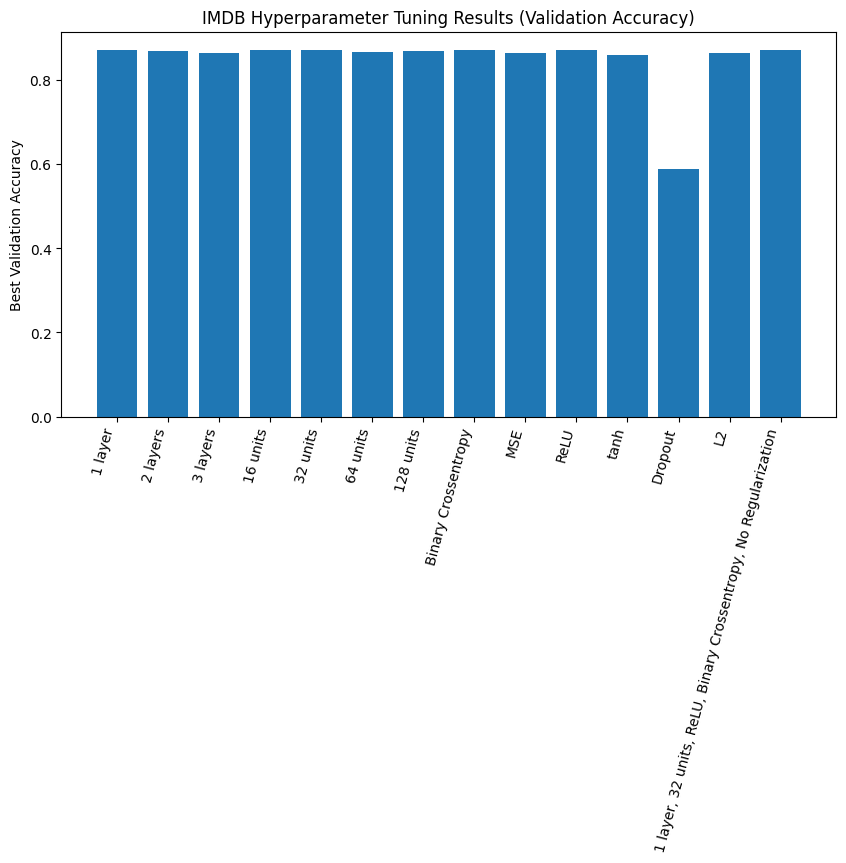

In [ ]:
# Plot Validation Accuracy

plt.figure(figsize=(10, 5))

labels = df_results["Configuration"]
val_acc = df_results["Best Validation Accuracy"]

plt.bar(labels, val_acc)
plt.xticks(rotation=75, ha="right")
plt.ylabel("Best Validation Accuracy")
plt.title("IMDB Hyperparameter Tuning Results (Validation Accuracy)")

plt.show()